In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
df = pd.read_csv(r'C:\Users\Sai Srinivas\Downloads\CarPrice_Assignment.csv')

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [6]:
df.shape

(205, 26)

In [7]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [8]:
# splitting out the model names and making company names retain
CompanyName = df['CarName'].apply(lambda x : x.split(' ')[0])

# creating a column with just comapany names are removing the old column "Companyname"
df.insert(3,"CompanyName",CompanyName)
df.drop(['CarName'],axis=1,inplace=True)
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [9]:
df['CompanyName'].replace({'maxda': 'mazda','porcshce':'porsche','toyouta':'toyota','vokswagen':'volkswagen','vw':'volkswagen'}, inplace = True)

<function matplotlib.pyplot.show(*args, **kw)>

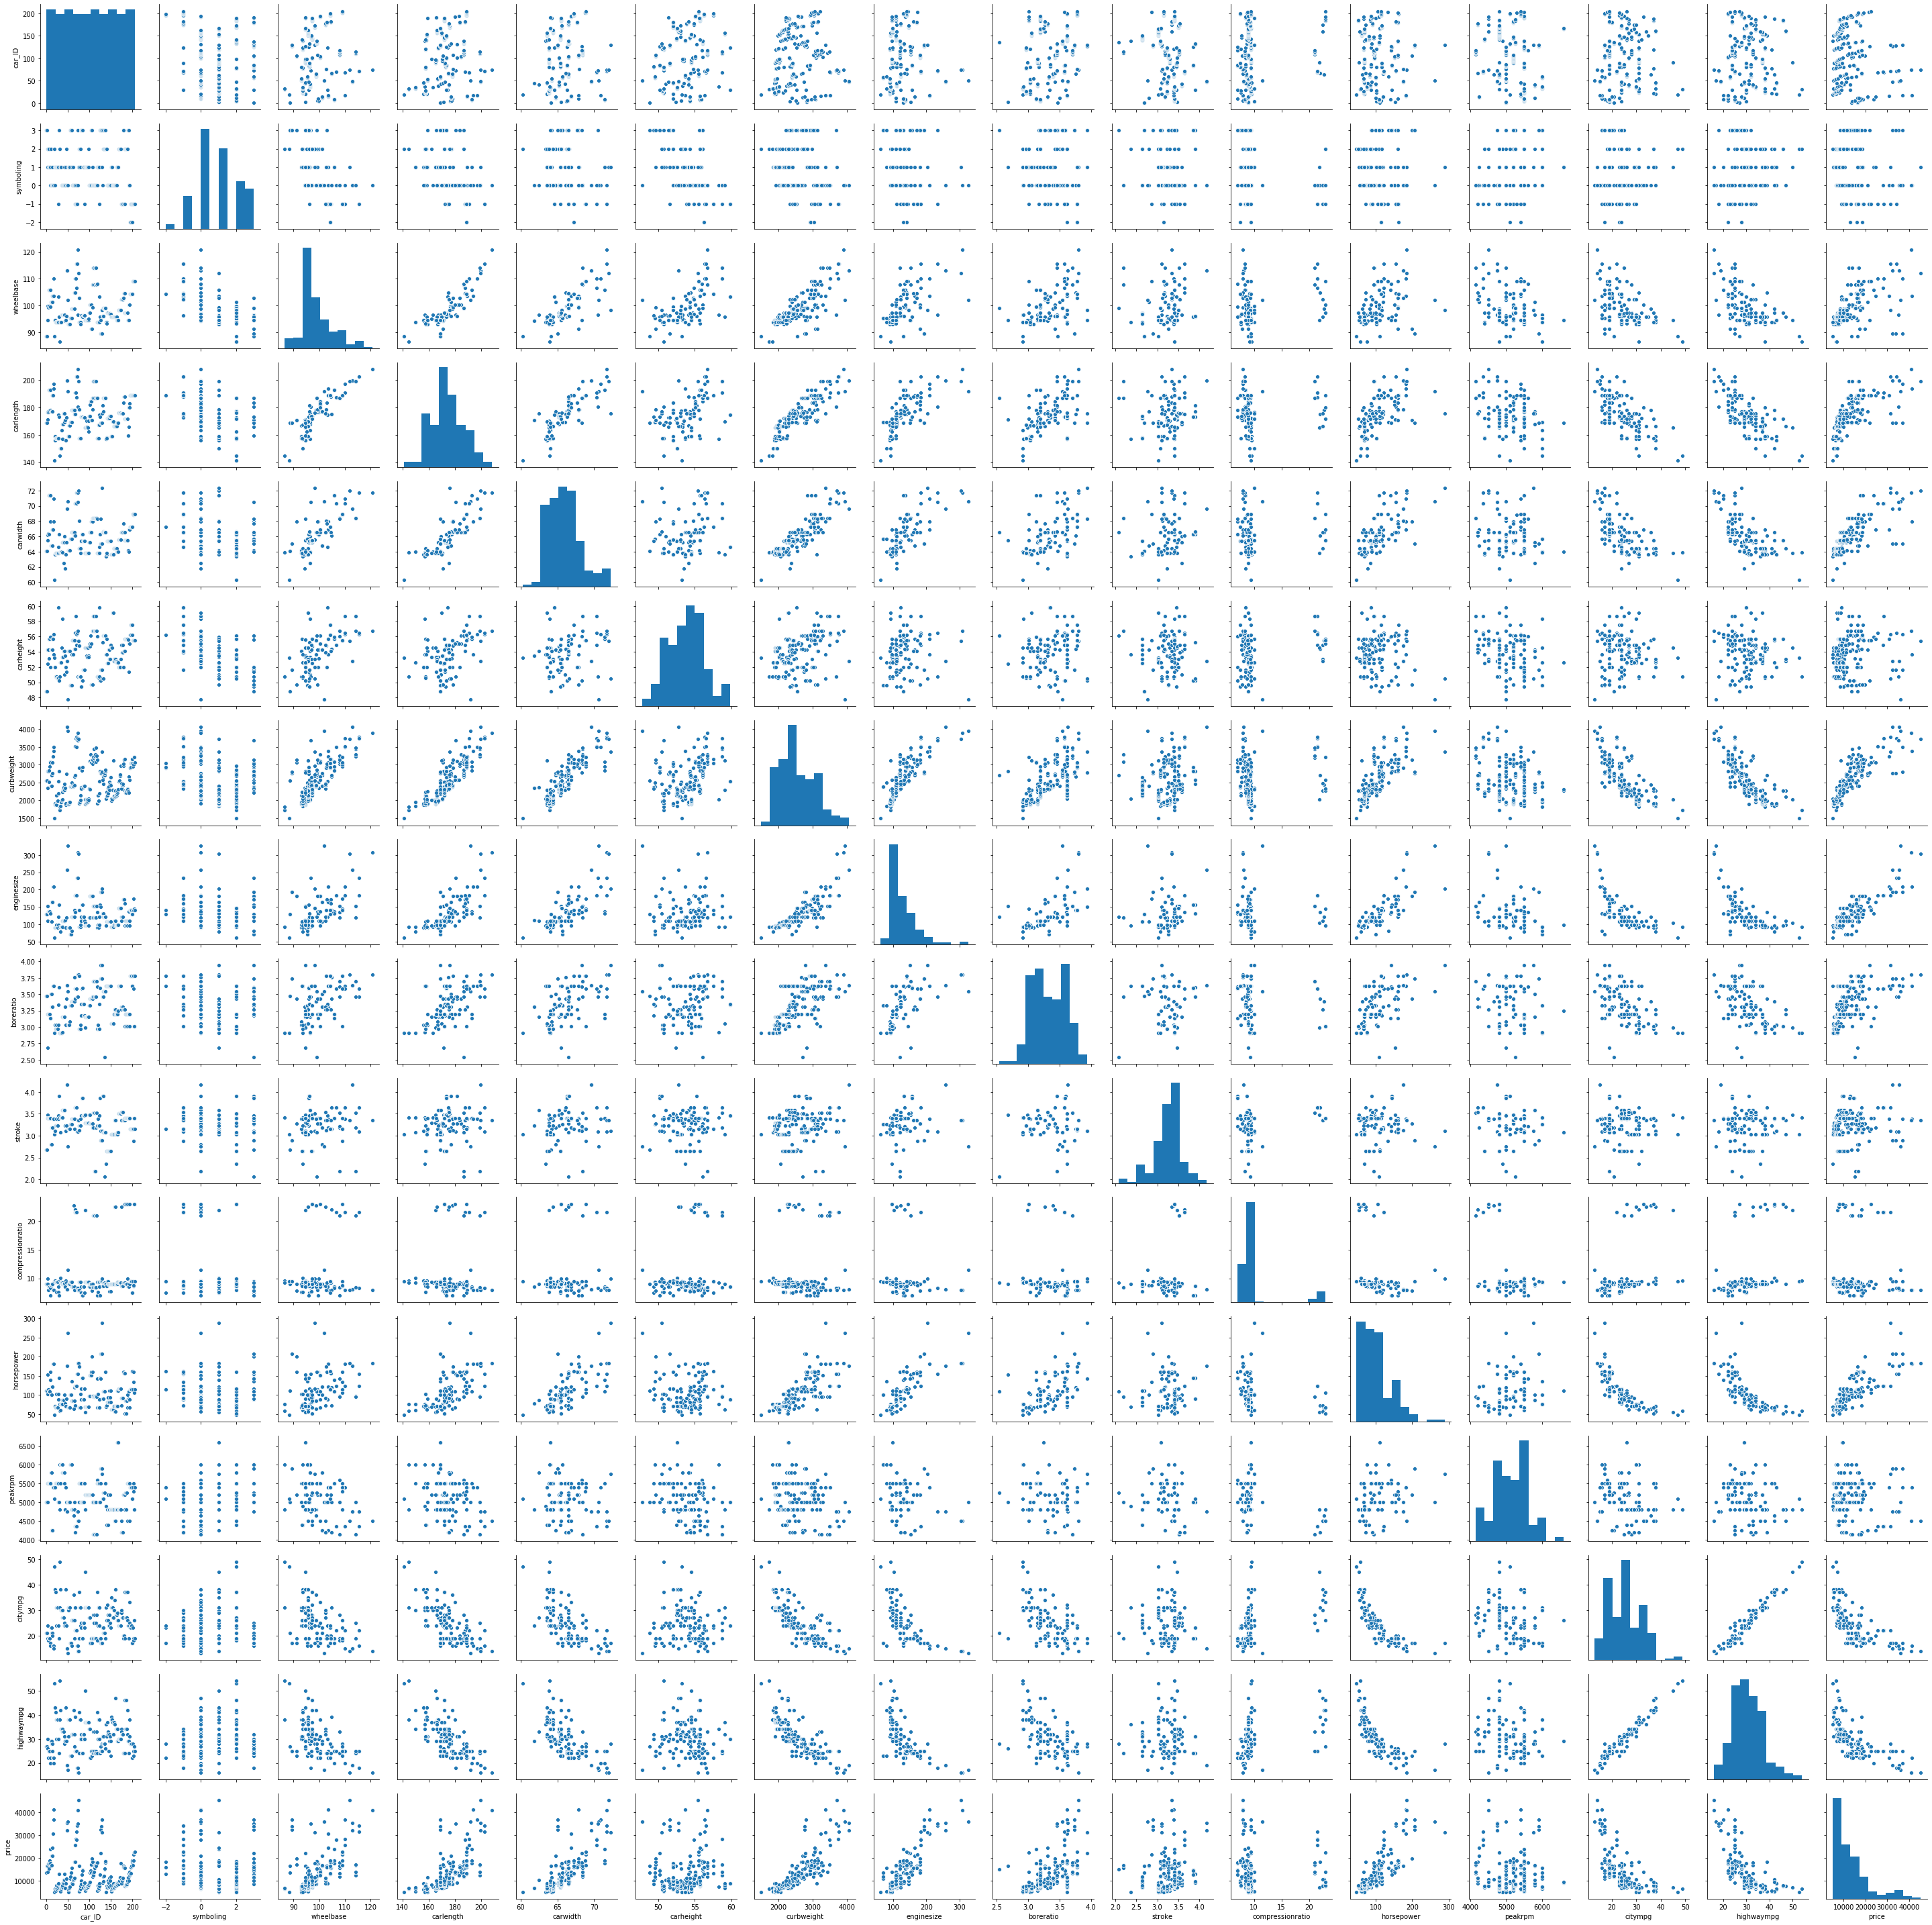

In [10]:
sns.pairplot(df)
plt.show

# inferences from the above pair plots
    - symboling and pricing shows a kind of categorical plot which follows in a range of -2 to 3
    - wheelbase, carlenght, carwidth,enginesize,horse power shows a positive correlation to the target variable "price"
    - citympg and highwaympg showing negative relation with the "price"

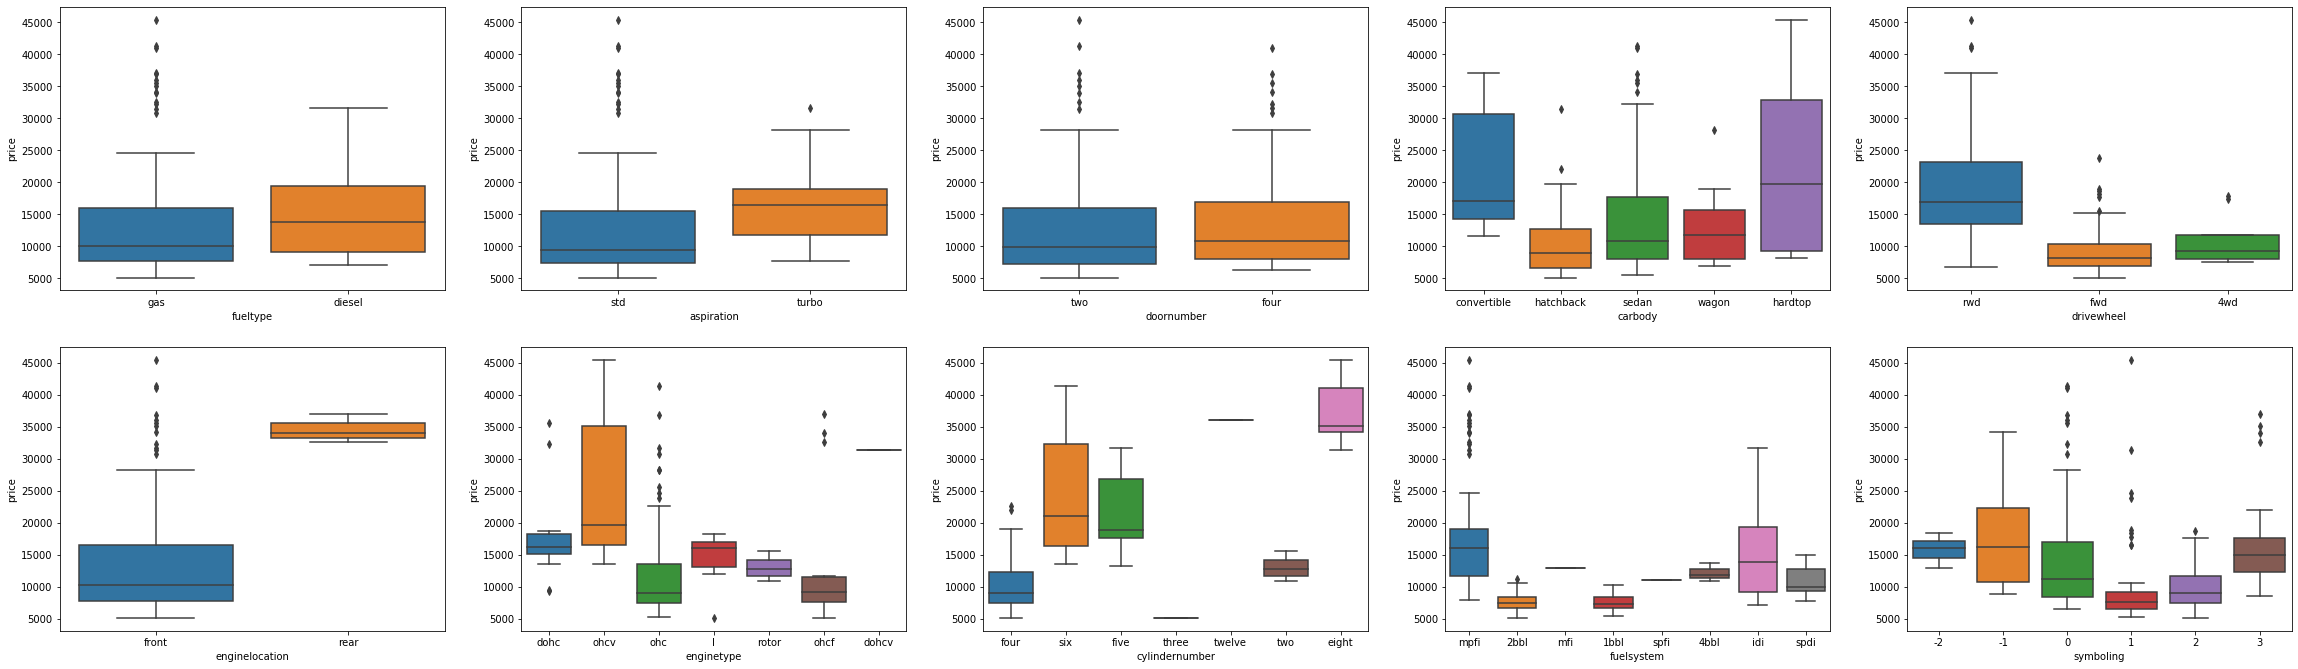

In [959]:
# plots of cater
plt.figure(figsize =(40,24))
plt.subplot(4,5,1)
sns.boxplot(x='fueltype', y = 'price', data = df)
plt.subplot(4,5,2)
sns.boxplot(x='aspiration', y = 'price', data = df)
plt.subplot(4,5,3)
sns.boxplot(x='doornumber', y = 'price', data = df)
plt.subplot(4,5,4)
sns.boxplot(x='carbody', y = 'price', data = df)
plt.subplot(4,5,5)
sns.boxplot(x='drivewheel', y = 'price', data = df)
plt.subplot(4,5,6)
sns.boxplot(x='enginelocation', y = 'price', data = df)
plt.subplot(4,5,7)
sns.boxplot(x='enginetype', y = 'price', data = df)
plt.subplot(4,5,8)
sns.boxplot(x='cylindernumber', y = 'price', data = df)
plt.subplot(4,5,9)
sns.boxplot(x='fuelsystem', y = 'price', data = df)
plt.subplot(4,5,10)
sns.boxplot(x='symboling', y = 'price', data = df)

# inferences from the categorical variables
    - the median of gas lies below the median of diesel but gas has more number of outliers so cannot give any inference and same goes with the aspiration
    - In the case of car body most people are preferring to have hardtop
    - Rear wheel drive is being sold in all ranges of price and most preferrable
    - the cars having engine at rear are having high value when compared to cars having front 
    - OHCV is the engine type which has the most preference
    - the more the number of cylinders the higher the price 

In [960]:
df.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


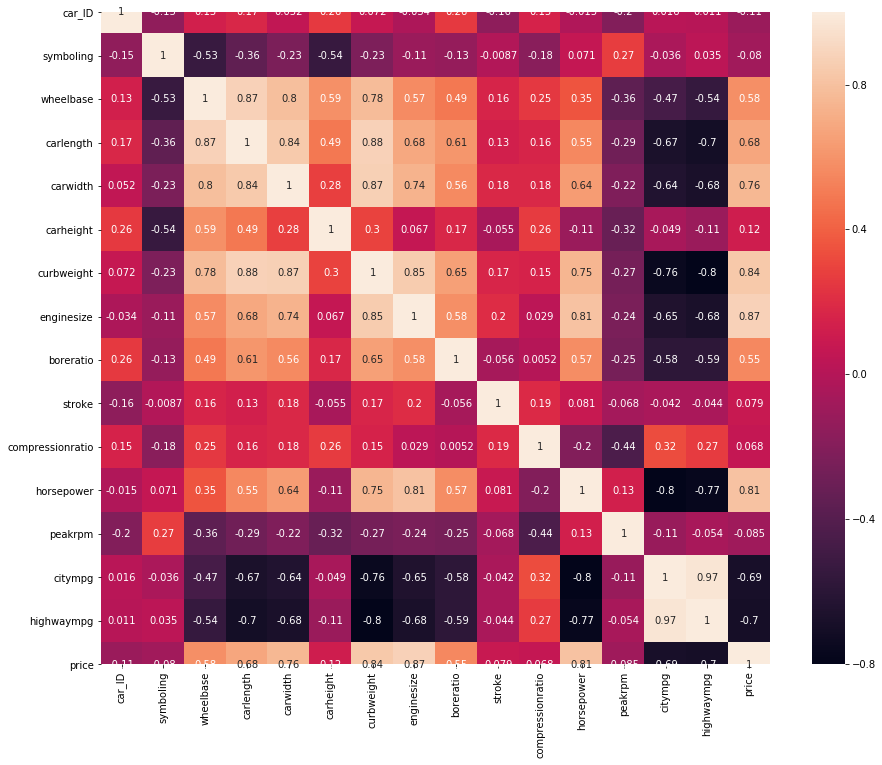

In [961]:
#plotting the correlation
plt.figure(figsize = (15,12))
sns.heatmap(df.corr(), annot = True)

## insignificant varibles
    - the following are the columns which have very low correlation with the target variable price
        - stroke
        - compression ratio
        - peak rpm

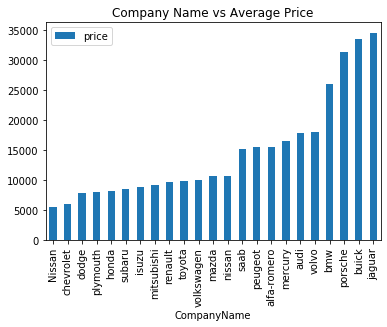

In [962]:
cprice = pd.DataFrame(df.groupby(['CompanyName'])['price'].mean().sort_values(ascending = True))
cprice.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

- the above stats shows that jaguar has the highest mean price than any other companies in the given data

In [963]:
# let us consider that in the most cases the travelling of a car is  within the city and outside the city will almost same so taking 0.5 times city and 0.5 times highway
df['fueleconomy'] = (0.5 * df['citympg']) + (0.5 * df['highwaympg'])

In [964]:
df.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'fueleconomy'],
      dtype='object')

In [965]:
print(df.price.describe(percentiles = [0.25,0.50,0.75,0.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


- from the above we can see that the variance between the min price and max price is high

In [966]:
#Binning the Car Companies based on percentile of prices of each Company.
df['price'] = df['price'].astype('int')
temp = df.copy()
table = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CompanyName')
bins = [0,15000,23000,40000]
cars_bin=['Budget','Medium','Highend']
df['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,24.0,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,24.0,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,22.5,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,27.0,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,20.0,Medium


# creating dummy variables
    - changing the columns from object variable to numeric variables

In [967]:
fuel_type = pd.get_dummies(df['fueltype'])
aspiration_type = pd.get_dummies(df['aspiration'])
carbody_type = pd.get_dummies(df['carbody'],drop_first= True)
enginelocation_type = pd.get_dummies(df['enginelocation'])
drivewheel_type = pd.get_dummies(df['drivewheel'])
engine_type= pd.get_dummies(df['enginetype'], drop_first = True)
cars_range = pd.get_dummies(df['carsrange'],drop_first = True)

In [968]:
carbody_type.head()

,hardtop,hatchback,sedan,wagon
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0


- dropping the first column of the carbody_type frame
    - convertible corresponds 0000
    - hardtop corresponds to 1000
    - hatcpack corrsponds to 0100
    - sedan corresponds to 0010
    - wagon corresponds to 0001

In [969]:
engine_type= pd.get_dummies(df['enginetype'], drop_first = True)
engine_type.head()

,dohcv,l,ohc,ohcf,ohcv,rotor
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


- dropping the first column of the enginetype frame
    - dohc corresponds 000000
    - dohcv corresponds to 100000
    - I corrsponds to 010000
    - ohc corresponds to 001000
    - ohcf corresponds to 000100
    - ohcv corresponds to 000010
    - rotor corresponds to 000001

In [970]:
cylinder_nos= pd.get_dummies(df['cylindernumber'],drop_first = True)
cylinder_nos.head()

,five,four,six,three,twelve,two
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0


- dropping the first column of the cylindernumber frame
    - eight corresponds 000000
    - five corresponds to 100000
    - four corrsponds to 010000
    - six corresponds to 001000
    - three corresponds to 000100
    - twelve corresponds to 000010
    - two corresponds to 000001

In [971]:
fuel_system= pd.get_dummies(df['fuelsystem'],drop_first = True)
fuel_system.head()

,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0


- dropping the first column of the cylindernumber frame
    - 1bbl corresponds 0000000
    - 2bbl corresponds to 1000000
    - 4bbl corrsponds to 0100000
    - idi corresponds to 0010000
    - mfi corresponds to 0001000
    - mpfi corresponds to 0000100
    - spdi corresponds to 0000010
    - spfi corresponds to 0000001

In [972]:
company_category = pd.get_dummies(df['CompanyName'],drop_first = True)
company_category.head()

,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [973]:
df = pd.concat([df,fuel_type,aspiration_type,carbody_type,enginelocation_type, drivewheel_type,engine_type, cylinder_nos,fuel_system,company_category,cars_range],axis = 1)

In [974]:
df.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'fueleconomy', 'carsrange', 'diesel', 'gas', 'std', 'turbo',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'front', 'rear', '4wd', 'fwd',
       'rwd', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four',
       'six', 'three', 'twelve', 'two', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi',
       'spdi', 'spfi', 'alfa-romero', 'audi', 'bmw', 'buick', 'chevrolet',
       'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru',
       'toyota', 'volkswagen', 'volvo', 'Medium', 'Highend'],
      dtype='object'

In [975]:
#df= df.drop(['fueltype','aspiration','carbody','drivewheel','enginelocation','carsrange','drivewheel','enginetype','cylindernumber','fuelsystem','highwaympg','citympg','CompanyName'],axis = 1)
df.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'fueleconomy', 'carsrange', 'diesel', 'gas', 'std', 'turbo',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'front', 'rear', '4wd', 'fwd',
       'rwd', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four',
       'six', 'three', 'twelve', 'two', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi',
       'spdi', 'spfi', 'alfa-romero', 'audi', 'bmw', 'buick', 'chevrolet',
       'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru',
       'toyota', 'volkswagen', 'volvo', 'Medium', 'Highend'],
      dtype='object'

In [976]:
df.shape

(205, 84)

In [977]:
df.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,Medium,Highend
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,...,0.060369,0.066796,0.047803,0.095362,0.174865,0.461496,0.360263,0.390310,0.077706,-0.255618
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,...,0.025103,0.224755,0.013252,0.232847,-0.067071,-0.094046,0.167106,-0.403849,-0.145384,-0.049092
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,...,-0.105511,-0.170472,-0.043896,0.009927,-0.107161,-0.046785,-0.047664,0.306228,0.448742,0.333254
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,...,-0.139780,-0.048682,0.041138,0.177076,-0.105172,-0.073906,-0.030714,0.285398,0.489754,0.373687
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,...,-0.143778,0.089564,0.029787,0.048052,-0.111605,-0.164234,-0.033924,0.228758,0.413485,0.453143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
toyota,0.461496,-0.094046,-0.046785,-0.073906,-0.164234,-0.000530,-0.094786,-0.083807,-0.079203,-0.000570,...,-0.080866,-0.068002,-0.042689,-0.074679,-0.107242,1.000000,-0.107242,-0.102411,-0.208464,-0.156610
volkswagen,0.360263,0.167106,-0.047664,-0.030714,-0.033924,0.149194,-0.101966,-0.117994,-0.184355,0.115246,...,-0.046884,-0.039426,-0.024750,-0.043297,-0.062176,-0.107242,1.000000,-0.059376,-0.120862,-0.090798
volvo,0.390310,-0.403849,0.306228,0.285398,0.228758,0.245342,0.221127,0.088077,0.293458,-0.082315,...,-0.044773,-0.037650,-0.023635,-0.041347,-0.059376,-0.102411,-0.059376,1.000000,0.491267,-0.086709
Medium,0.077706,-0.145384,0.448742,0.489754,0.413485,0.381024,0.384950,0.090537,0.261717,-0.175250,...,-0.091137,-0.076639,-0.048111,0.358237,-0.120862,-0.208464,-0.120862,0.491267,1.000000,-0.176500


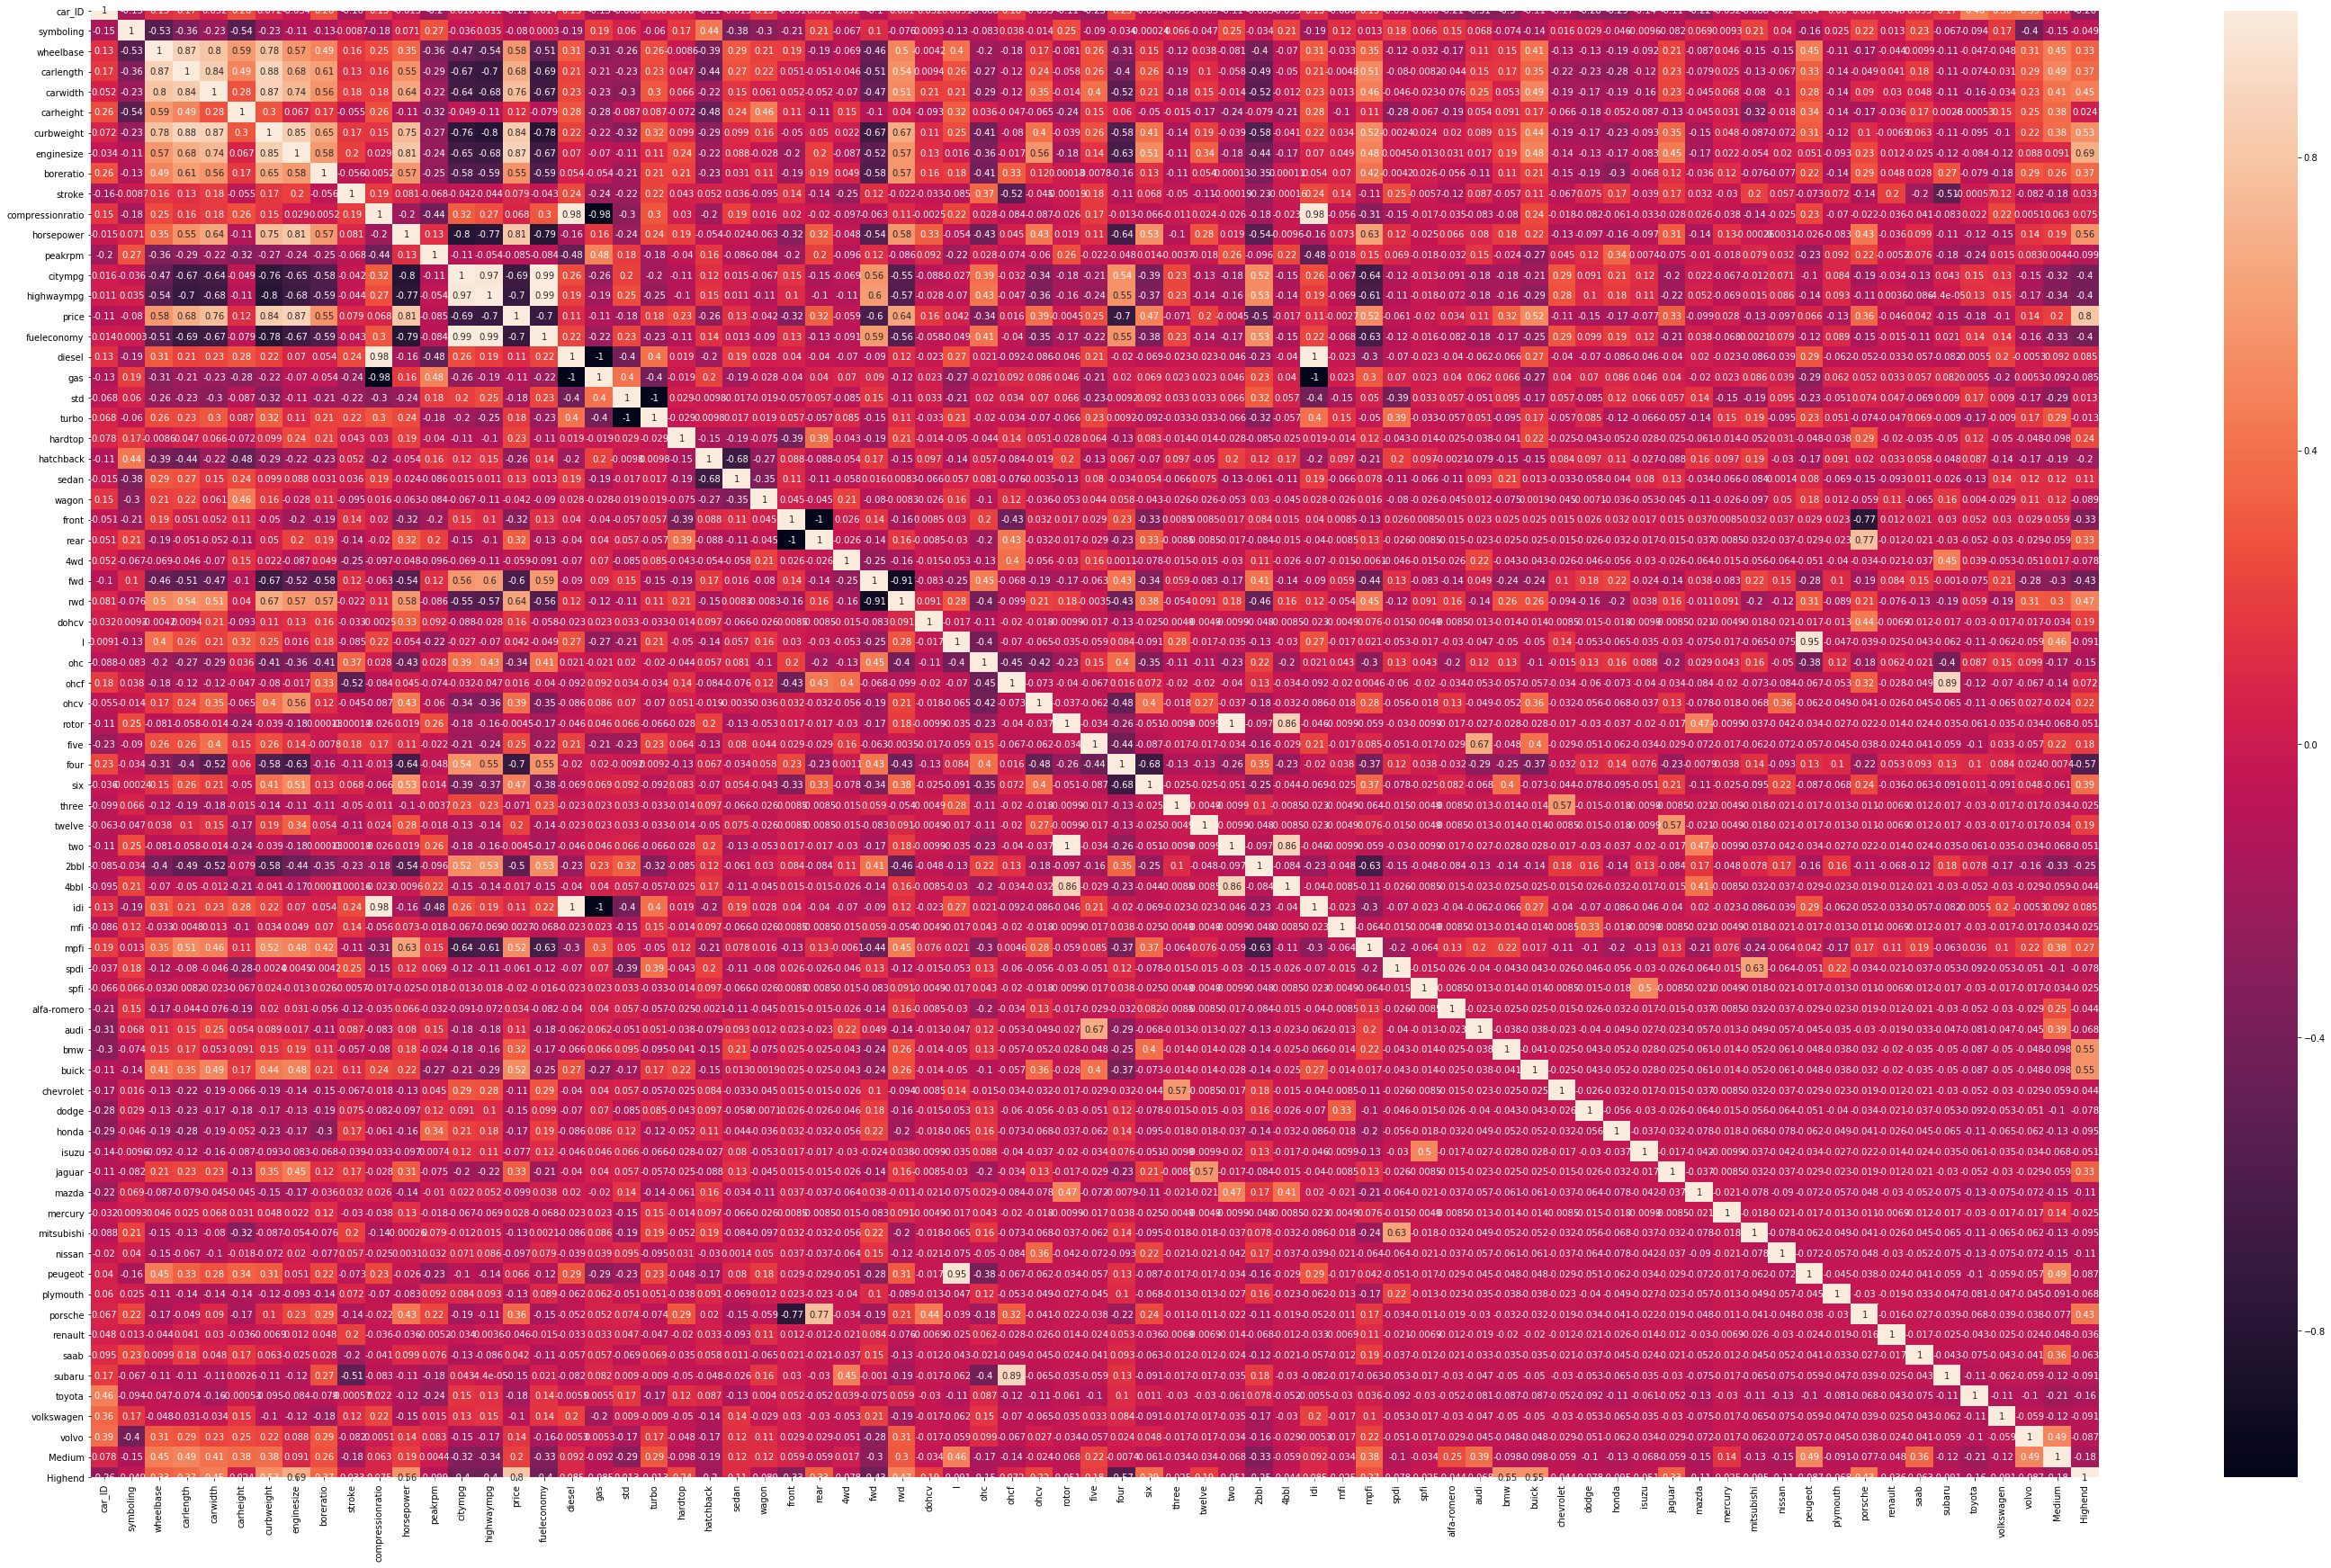

In [978]:
#plotting the correlation
plt.figure(figsize = (50,30))
sns.heatmap(df.corr(), annot = True)

In [1117]:
#'price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase','curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 'fueleconomy', 'carlength','carwidth', 'carsrange'
df_lr = df[['car_ID', 'symboling','fueleconomy',
       'volkswagen', 'volvo', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio',
        'horsepower', 'price', 'diesel', 'gas',
       'std', 'turbo', 'hardtop', 'hatchback', 'sedan', 'wagon',
       'front', 'rear', '4wd', 'fwd', 'rwd', 'dohcv', 'l', 'ohc', 'ohcf',
       'ohcv', 'rotor', 'five','four', 'six', 'three', 'twelve', 'two',
       '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi','Medium', 'Highend']]
df_lr.head()

,car_ID,symboling,fueleconomy,volkswagen,volvo,wheelbase,carlength,carwidth,carheight,curbweight,...,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,Medium,Highend
0,1,3,24.0,0,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,1,0,0,1,0
1,2,3,24.0,0,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,1,0,0,1,0
2,3,1,22.5,0,0,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,1,0,0,1,0
3,4,2,27.0,0,0,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,1,0,0,1,0
4,5,2,20.0,0,0,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,1,0,0,1,0


In [1118]:
df_lr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 48 columns):
car_ID         205 non-null int64
symboling      205 non-null int64
fueleconomy    205 non-null float64
volkswagen     205 non-null uint8
volvo          205 non-null uint8
wheelbase      205 non-null float64
carlength      205 non-null float64
carwidth       205 non-null float64
carheight      205 non-null float64
curbweight     205 non-null int64
enginesize     205 non-null int64
boreratio      205 non-null float64
horsepower     205 non-null int64
price          205 non-null int32
diesel         205 non-null uint8
gas            205 non-null uint8
std            205 non-null uint8
turbo          205 non-null uint8
hardtop        205 non-null uint8
hatchback      205 non-null uint8
sedan          205 non-null uint8
wagon          205 non-null uint8
front          205 non-null uint8
rear           205 non-null uint8
4wd            205 non-null uint8
fwd            205 non-null uint8

# test-train-split

In [1119]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(df_lr, train_size = 0.8, test_size = 0.2, random_state = 100)

### Rescaling the variables of the train_data

In [1120]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [1121]:
print(df_train.shape)
print(df_test.shape)

(164, 48)
(41, 48)


In [1122]:
df_train.head()
df_train.columns

Index(['car_ID', 'symboling', 'fueleconomy', 'volkswagen', 'volvo',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'horsepower', 'price', 'diesel', 'gas',
       'std', 'turbo', 'hardtop', 'hatchback', 'sedan', 'wagon', 'front',
       'rear', '4wd', 'fwd', 'rwd', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv',
       'rotor', 'five', 'four', 'six', 'three', 'twelve', 'two', '2bbl',
       '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi', 'Medium', 'Highend'],
      dtype='object')

In [1123]:
print(df_train.describe())

           car_ID   symboling  fueleconomy  volkswagen       volvo  \
count  164.000000  164.000000   164.000000  164.000000  164.000000   
mean    98.987805    0.835366    28.484756    0.067073    0.036585   
std     59.891106    1.209763     6.772695    0.250915    0.188317   
min      1.000000   -2.000000    15.000000    0.000000    0.000000   
25%     45.750000    0.000000    22.500000    0.000000    0.000000   
50%     97.500000    1.000000    28.000000    0.000000    0.000000   
75%    150.250000    2.000000    34.000000    0.000000    0.000000   
max    205.000000    3.000000    51.500000    1.000000    1.000000   

        wheelbase   carlength    carwidth   carheight  curbweight  ...  \
count  164.000000  164.000000  164.000000  164.000000  164.000000  ...   
mean     0.404605    0.519899    0.454726   53.595122    0.398579  ...   
std      0.197731    0.197651    0.179980    2.469838    0.202330  ...   
min      0.000000    0.000000    0.000000   47.800000    0.000000  ...   

In [1124]:
#Dividing data into X(independent variables) and y(target) variables
y_train = df_train.pop('price')
X_train = df_train

## recursive feature elimination 
    - as the number of columns are more adding or removing a selected column will be difficult, But in RFE the program will automatically eliminates the variables which have high p values and vif from the model

In [1125]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1126]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,13)
rfe = rfe.fit(X_train, y_train)

In [1127]:
print(rfe.support_)
print(rfe.ranking_)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[False False False False False False False  True False  True  True  True
  True False False False False False False False False  True  True False
 False False  True False False False False  True False False False  True
  True False False False False False False False False  True  True]
[34 33 31 24 21 11 15  1 27  1  1  1  1 26 32 25 22  2  3  5  4  1  1 29
 23 28  1 16  7  6 17  1  8 12 13  1  1 18 30 19 14  9 20 10 35  1  1]


[('car_ID', False, 34),
 ('symboling', False, 33),
 ('fueleconomy', False, 31),
 ('volkswagen', False, 24),
 ('volvo', False, 21),
 ('wheelbase', False, 11),
 ('carlength', False, 15),
 ('carwidth', True, 1),
 ('carheight', False, 27),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('horsepower', True, 1),
 ('diesel', False, 26),
 ('gas', False, 32),
 ('std', False, 25),
 ('turbo', False, 22),
 ('hardtop', False, 2),
 ('hatchback', False, 3),
 ('sedan', False, 5),
 ('wagon', False, 4),
 ('front', True, 1),
 ('rear', True, 1),
 ('4wd', False, 29),
 ('fwd', False, 23),
 ('rwd', False, 28),
 ('dohcv', True, 1),
 ('l', False, 16),
 ('ohc', False, 7),
 ('ohcf', False, 6),
 ('ohcv', False, 17),
 ('rotor', True, 1),
 ('five', False, 8),
 ('four', False, 12),
 ('six', False, 13),
 ('three', True, 1),
 ('twelve', True, 1),
 ('two', False, 18),
 ('2bbl', False, 30),
 ('4bbl', False, 19),
 ('idi', False, 14),
 ('mfi', False, 9),
 ('mpfi', False, 20),
 ('spdi', False

In [1128]:
X_train.columns[rfe.support_]

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower',
       'front', 'rear', 'dohcv', 'rotor', 'three', 'twelve', 'Medium',
       'Highend'],
      dtype='object')

In [1129]:
#taking some columns in to the X_train_rfe to build a model
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,carwidth,curbweight,enginesize,boreratio,horsepower,front,rear,dohcv,rotor,three,twelve,Medium,Highend
3,0.491667,0.329325,0.181132,0.404762,0.225000,1,0,0,0,0,0,1,0
157,0.341667,0.240884,0.139623,0.404762,0.091667,1,0,0,0,0,0,0,0
81,0.425000,0.325834,0.230189,0.531746,0.166667,1,0,0,0,0,0,0,0
32,0.308333,0.135376,0.067925,0.182540,0.050000,1,0,0,0,0,0,0,0
99,0.408333,0.324282,0.222642,0.515873,0.204167,1,0,0,0,0,0,0,0


## creating functions for model building and verifying vif

In [1130]:
def model_building(X,y):
    #Adding the constant
    X = sm.add_constant(X) 
    
    # fitting the model
    lm = sm.OLS(y,X).fit()
    
    # model summary
    print(lm.summary())
    return X


def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

## model 1

In [1131]:
X_train_n = model_building(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     204.1
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           8.80e-87
Time:                        18:41:25   Log-Likelihood:                 255.19
No. Observations:                 164   AIC:                            -484.4
Df Residuals:                     151   BIC:                            -444.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0236      0.018      1.345      0.1

In [1132]:
checkVIF(X_train_rfe)

,Features,VIF
5,front,13.71
2,enginesize,13.17
1,curbweight,10.37
4,horsepower,5.50
0,carwidth,4.62
12,Highend,2.56
11,Medium,1.89
3,boreratio,1.82
7,dohcv,1.61
6,rear,1.58


In [1133]:
X_train_n1 = X_train_rfe.drop(["three"], axis = 1)

- the cars having the 3 cylinders of engine is having less significance

## model-2

In [1134]:
X_train_n2 = model_building(X_train_n1,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     219.4
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           2.60e-87
Time:                        18:41:26   Log-Likelihood:                 253.55
No. Observations:                 164   AIC:                            -483.1
Df Residuals:                     152   BIC:                            -445.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0266      0.018      1.511      0.1

In [1135]:
checkVIF(X_train_n2)

,Features,VIF
6,front,inf
7,rear,inf
3,enginesize,13.17
2,curbweight,10.37
5,horsepower,5.50
1,carwidth,4.50
12,Highend,2.53
11,Medium,1.87
4,boreratio,1.81
8,dohcv,1.61


In [1136]:
X_train_n3 = X_train_n2.drop(["dohcv"], axis = 1)

- the cars having the engine type dohcv have high p value which shows less significance

## model 3

In [1137]:
X_train_n4 = model_building(X_train_n3,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     237.6
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           7.96e-88
Time:                        18:41:27   Log-Likelihood:                 251.84
No. Observations:                 164   AIC:                            -481.7
Df Residuals:                     153   BIC:                            -447.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0362      0.017      2.147      0.0

In [1138]:
checkVIF(X_train_n4)

,Features,VIF
6,front,inf
7,rear,inf
3,enginesize,12.31
2,curbweight,9.97
1,carwidth,4.22
5,horsepower,3.99
11,Highend,2.42
10,Medium,1.85
4,boreratio,1.78
8,rotor,1.51


In [1139]:
X_train_n5 = X_train_n4.drop(["twelve"], axis = 1)

- the cars having V12 engines (12 cylinders) is having less significance to the other variables 

## model 4

In [1140]:
X_train_n6 = model_building(X_train_n5,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     258.6
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           3.44e-88
Time:                        18:41:29   Log-Likelihood:                 249.73
No. Observations:                 164   AIC:                            -479.5
Df Residuals:                     154   BIC:                            -448.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0416      0.017      2.480      0.0

In [1141]:
checkVIF(X_train_n6)

,Features,VIF
6,front,inf
7,rear,inf
3,enginesize,9.85
2,curbweight,9.19
1,carwidth,4.21
5,horsepower,3.99
10,Highend,2.41
9,Medium,1.83
4,boreratio,1.75
8,rotor,1.43


In [1142]:
X_train_n7 = X_train_n6.drop(["front"], axis = 1)

- the cars having the engine at front location seems high correlation with the other varibles

## model 5

In [1143]:
X_train_n8 = model_building(X_train_n7,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     258.6
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           3.44e-88
Time:                        18:41:30   Log-Likelihood:                 249.73
No. Observations:                 164   AIC:                            -479.5
Df Residuals:                     154   BIC:                            -448.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0684      0.015     -4.515      0.0

In [1144]:
checkVIF(X_train_n8)

,Features,VIF
0,const,12.69
3,enginesize,9.85
2,curbweight,9.19
1,carwidth,4.21
5,horsepower,3.99
9,Highend,2.41
8,Medium,1.83
4,boreratio,1.75
7,rotor,1.43
6,rear,1.40


In [1145]:
X_train_n9 = X_train_n8.drop(["enginesize"], axis = 1)

- enginesize is having the high VIF which shows more correlation with other variables

## model-6

In [1146]:
X_train_n10= model_building(X_train_n9,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     278.1
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           8.00e-88
Time:                        18:41:31   Log-Likelihood:                 245.78
No. Observations:                 164   AIC:                            -473.6
Df Residuals:                     155   BIC:                            -445.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0678      0.015     -4.383      0.0

In [1147]:
checkVIF(X_train_n10)

,Features,VIF
0,const,12.69
2,curbweight,6.11
1,carwidth,4.20
4,horsepower,2.90
8,Highend,2.21
3,boreratio,1.75
7,Medium,1.64
5,rear,1.40
6,rotor,1.03


In [1148]:
X_train_n11 = X_train_n10.drop(["curbweight"], axis = 1)

- Here all the p values are very low but the variable curbweight is having the high VIF which shows more correlation between other variables

## model 7

In [1149]:
X_train_n12= model_building(X_train_n11,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     253.8
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           7.71e-82
Time:                        18:41:32   Log-Likelihood:                 228.18
No. Observations:                 164   AIC:                            -440.4
Df Residuals:                     156   BIC:                            -415.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0699      0.017     -4.072      0.0

In [1150]:
checkVIF(X_train_n12)

,Features,VIF
0,const,12.68
1,carwidth,2.86
3,horsepower,2.43
7,Highend,2.04
2,boreratio,1.63
6,Medium,1.55
4,rear,1.36
5,rotor,1.03


In [1151]:
X_train_n13 = X_train_n12.drop(["boreratio"], axis = 1)

- Here boreratio is having the high p value which is greater than 0.05 

## model 8

In [1152]:
X_train_n14= model_building(X_train_n13,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     294.9
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           9.11e-83
Time:                        18:41:34   Log-Likelihood:                 227.39
No. Observations:                 164   AIC:                            -440.8
Df Residuals:                     157   BIC:                            -419.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0788      0.016     -5.066      0.0

In [1153]:
checkVIF(X_train_n14)

,Features,VIF
0,const,10.40
1,carwidth,2.69
2,horsepower,2.33
6,Highend,2.03
5,Medium,1.54
3,rear,1.34
4,rotor,1.02


In [1154]:
X_train_n15 = X_train_n14.drop(["rotor"], axis = 1)

- Here rotor is having the high p value compared to the any other variable, even though it has low VIF we must prioritize the max p value to drop, so dropping rotor variable

## model 9

In [1155]:
X_train_n16= model_building(X_train_n15,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     349.6
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.73e-83
Time:                        18:41:36   Log-Likelihood:                 226.01
No. Observations:                 164   AIC:                            -440.0
Df Residuals:                     158   BIC:                            -421.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0790      0.016     -5.050      0.0

In [1156]:
checkVIF(X_train_n16)

,Features,VIF
0,const,10.40
1,carwidth,2.69
2,horsepower,2.31
5,Highend,2.00
4,Medium,1.52
3,rear,1.34


- at this stage we cannot see any high VIF values as well as p values which gives the significant varibles
- so taking this as the final model for the given dataset

# Residual analysis

- testing whether the error terms of the model are normally distributed or not

In [1157]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

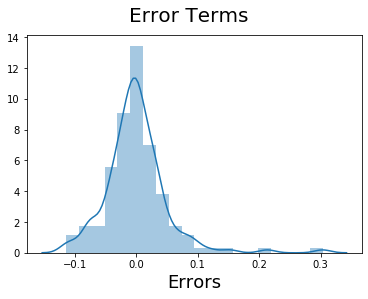

In [1158]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)  
plt.xlabel('Errors', fontsize = 18) 

- Error terms are normally distributed

## predicting the test data set using the final model

In [1160]:
#Scaling the test set
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth','price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [1161]:
df_test.describe()

,car_ID,symboling,fueleconomy,volkswagen,volvo,wheelbase,carlength,carwidth,carheight,curbweight,...,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,Medium,Highend
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,...,41.0,41.000000,41.0,41.000000,41.0,41.000000,41.000000,41.000000,41.000000,41.000000
mean,119.048780,0.829268,25.987805,0.024390,0.121951,0.403755,0.525216,0.330756,54.243902,0.430890,...,0.0,0.195122,0.0,0.073171,0.0,0.634146,0.048780,0.024390,0.292683,0.146341
std,54.780905,1.394676,5.881632,0.156174,0.331295,0.200461,0.195838,0.243707,2.290857,0.235954,...,0.0,0.401218,0.0,0.263652,0.0,0.487652,0.218085,0.156174,0.460646,0.357839
min,12.000000,-2.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,49.700000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75.000000,0.000000,21.500000,0.000000,0.000000,0.271137,0.426772,0.170732,52.600000,0.271985,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,119.000000,1.000000,25.500000,0.000000,0.000000,0.364431,0.497638,0.329268,54.900000,0.439692,...,0.0,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000
75%,168.000000,2.000000,29.000000,0.000000,0.000000,0.516035,0.662992,0.414634,55.700000,0.589140,...,0.0,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.000000,1.000000,0.000000
max,202.000000,3.000000,42.500000,1.000000,1.000000,1.000000,1.000000,1.000000,58.700000,1.000000,...,0.0,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [1162]:
y_test = df_test.pop('price')
X_test = df_test

In [1170]:
# Now let's use our model to make predictions.
X_train_new = X_train_n.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

In [1171]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [1172]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [1173]:
# Comparision:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8451099369852125

Text(0, 0.5, 'y_pred')

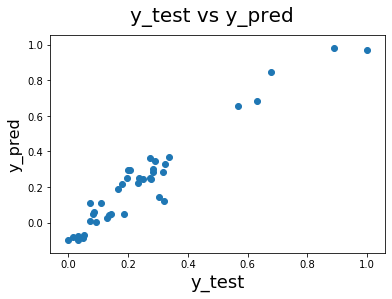

In [1174]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

Text(0, 0.5, 'Car Price')

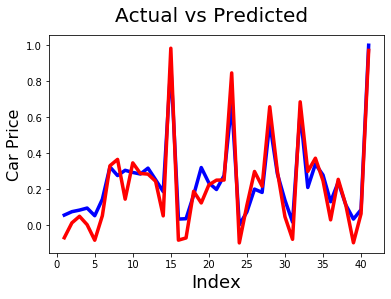

In [1184]:
# Actual vs Predicted
c = [i for i in range(1,42,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=3.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_pred, color="red",  linewidth=3.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual vs Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)  

- the above fig shows the satisfactory overlap of test and train

## Final model

In [1178]:
X_train_n16= model_building(X_train_n15,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     349.6
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.73e-83
Time:                        18:59:50   Log-Likelihood:                 226.01
No. Observations:                 164   AIC:                            -440.0
Df Residuals:                     158   BIC:                            -421.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0790      0.016     -5.050      0.0

<font size = 6 color = "Green">
*Final Model Inference:*
    
<font size = 4 color = "blue">   
**Price = -0.0790 + 0.3668*(horsepower) + 0.3424*(carwidth) + 0.3341*(Highend) + 0.2079*(rear) + 0.0861*(Medium)**
    - the train data set has shown an R-squared value of 91.4 percent as the test data shows 85%  

- the following independent variables have impact on target variables as per the above model
    - Horse power
    - carwidth
    - highend cars
    - the cars having engines on back 
    - medium range cars